In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
temp_counters = np.load('all_counters_temp_data_20190913_194220.npz')
counts_32k, counts_2M, counts_LC, counts_HFclock, counts_IF, temperature = temp_counters['counts_32k'], temp_counters['counts_2M'], temp_counters['counts_LC'], temp_counters['counts_HFclock'], temp_counters['counts_IF'], temp_counters['temperature']

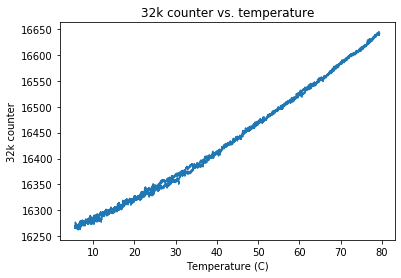

In [3]:
plt.plot(temperature, counts_32k)
plt.title('32k counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('32k counter')
plt.show()

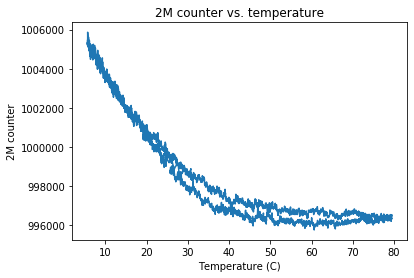

In [4]:
plt.plot(temperature, counts_2M)
plt.title('2M counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('2M counter')
plt.show()

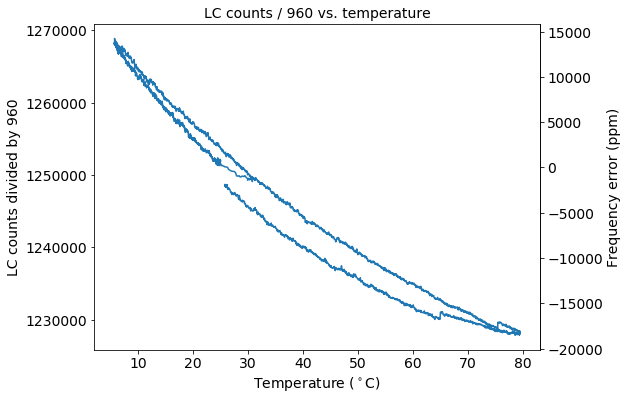

In [5]:
def lc_count_to_ppm(lc_count):
    return (lc_count * 960 * 2 - 2.402e9) / (2.402e9 / 1e6)

def ppm_to_lc_count(ppm):
    return (ppm * (2.402e9 / 1e6) + 2.402e9) / 960 / 2

fig = plt.figure(figsize=(8, 6))
plt.plot(temperature, counts_LC)
plt.title('LC counts / 960 vs. temperature', fontsize=14)
plt.xlabel('Temperature ($^\circ$C)', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
secax = ax.secondary_yaxis('right', functions=(lc_count_to_ppm, ppm_to_lc_count))
secax.set_ylabel('Frequency error (ppm)', fontsize=14)
secax.tick_params(labelsize=14)

plt.savefig('lc_count_vs_temp.pdf', bbox_inches='tight')
plt.show()

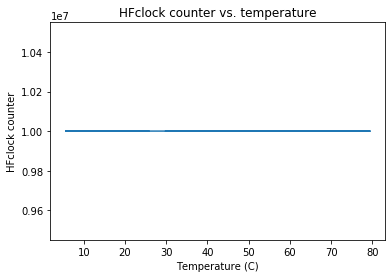

In [6]:
plt.plot(temperature, counts_HFclock)
plt.title('HFclock counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('HFclock counter')
plt.show()

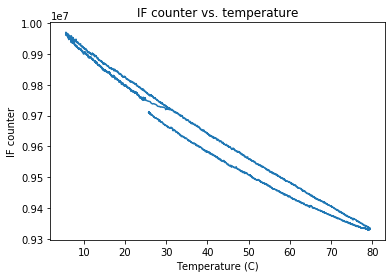

In [7]:
plt.plot(temperature, counts_IF)
plt.title('IF counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('IF counter')
plt.show()